In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import anndata
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [9]:


# Define GCN Layers and Model
class GCNLayer(nn.Module):
    def __init__(self, in_features, out_features):
        super(GCNLayer, self).__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, A, X):
        D = torch.diag(torch.sum(A, dim=1))
        D_sqrt_inv = torch.pow(D, -0.5)
        D_sqrt_inv[torch.isinf(D_sqrt_inv)] = 0.0  # Handle inf values resulting from zero division
        A_hat = torch.matmul(torch.matmul(D_sqrt_inv, A), D_sqrt_inv)
        return F.relu(self.linear(torch.matmul(A_hat, X)))

class GCN(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(GCN, self).__init__()
        self.gcn1 = GCNLayer(in_features, hidden_features)
        self.gcn2 = GCNLayer(hidden_features, hidden_features)
        self.gcn3 = GCNLayer(hidden_features, out_features)

    def forward(self, A, X):
        X = self.gcn1(A, X)
        X = self.gcn2(A, X)
        X = self.gcn3(A, X)
        return X

def train_gcn(gcn, A, X, epochs=200, lr=0.01):
    optimizer = torch.optim.Adam(gcn.parameters(), lr=lr)
    criterion = nn.MSELoss()
    
    for epoch in range(epochs):
        gcn.train()
        optimizer.zero_grad()
        
        embeddings = gcn(A, X)
        reconstructed_A = torch.matmul(embeddings, embeddings.t())
        
        loss = criterion(reconstructed_A, A)
        loss.backward()
        optimizer.step()
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')
    
    return gcn

def self_expressive_layer(Z):
    N = Z.shape[0]
    Q = np.zeros((N, N))
    for i in range(N):
        Zi = Z[i]
        Zj = np.delete(Z, i, axis=0)
        Q[i, np.arange(N) != i] = np.linalg.lstsq(Zj.T, Zi, rcond=None)[0]
    return Q

def community_detection(Z, num_communities):
    Q = self_expressive_layer(Z)
    kmeans = KMeans(n_clusters=num_communities)
    communities = kmeans.fit_predict(Q)
    return communities




In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvLayer(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=1):
        super(ConvLayer, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)

    def forward(self, x):
        x = self.conv(x)
        return F.relu(x)

class CNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, kernel_size=3):
        super(CNN, self).__init__()
        self.conv1 = ConvLayer(in_channels, hidden_channels, kernel_size)
        self.conv2 = ConvLayer(hidden_channels, hidden_channels, kernel_size)
        self.conv3 = ConvLayer(hidden_channels, out_channels, kernel_size)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        return x




In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Conv1DLayer(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=1):
        super(Conv1DLayer, self).__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, stride, padding)

    def forward(self, x):
        x = self.conv(x)
        return F.relu(x)

class CNN1D(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, kernel_size=3):
        super(CNN1D, self).__init__()
        self.conv1 = Conv1DLayer(in_channels, hidden_channels, kernel_size)
        self.conv2 = Conv1DLayer(hidden_channels, hidden_channels, kernel_size)
        self.conv3 = Conv1DLayer(hidden_channels, out_channels, kernel_size)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        return x

# Example usage
model = CNN1D(in_channels=1, hidden_channels=32, out_channels=32, kernel_size=3)
print(model)


CNN1D(
  (conv1): Conv1DLayer(
    (conv): Conv1d(1, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  )
  (conv2): Conv1DLayer(
    (conv): Conv1d(32, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  )
  (conv3): Conv1DLayer(
    (conv): Conv1d(32, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  )
)


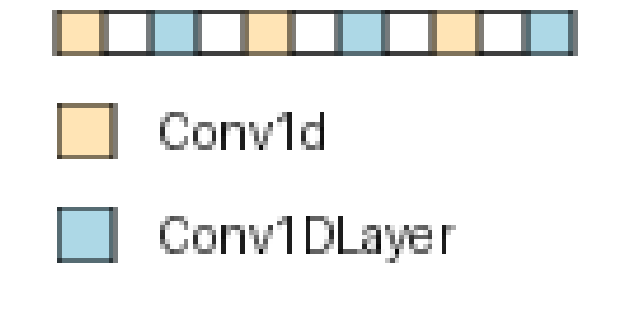

In [28]:


input_shape = (7257, 1, 1)

img = visualtorch.layered_view(model, input_shape=input_shape, draw_volume=False, legend=True, )

plt.axis("off")
plt.tight_layout()
plt.imshow(img)
plt.show()

In [5]:
!micromamba env list

  Name        Active  Path                                        
────────────────────────────────────────────────────────────────────
                      /home1/jijh/miniconda3                      
  base                /public/home/jijh/micromamba                
  atac_sc             /public/home/jijh/micromamba/envs/atac_sc   
  bypy                /public/home/jijh/micromamba/envs/bypy      
  jupytoll            /public/home/jijh/micromamba/envs/jupytoll  
  opencv              /public/home/jijh/micromamba/envs/opencv    
  pytorch             /public/home/jijh/micromamba/envs/pytorch   
  sc_batch            /public/home/jijh/micromamba/envs/sc_batch  
  scvi_env            /public/home/jijh/micromamba/envs/scvi_env  
  sd_test             /public/home/jijh/micromamba/envs/sd_test   
  seurat              /public/home/jijh/micromamba/envs/seurat    
  spateo              /public/home/jijh/micromamba/envs/spateo    
  spatial     *       /public/home/jijh/micromamba/envs/spat